In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
url = 'http://ia.azc.uam.mx/sourcecode/winequality-red.csv'
df_wine = pd.read_csv(url, sep=';')
df_wine.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [6]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

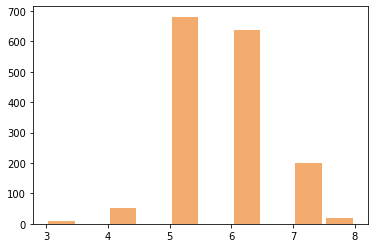

In [9]:
plt.hist(x=df_wine['quality'], color='#F2AB6D', rwidth=0.85)
plt.show()

In [13]:
df_wine['calidad'] = [1 if x>= 6 else 0 for x in df_wine['quality']]
X = df_wine.drop(['quality', 'calidad'], axis=1)
y = df_wine['calidad']

In [15]:
df_wine['calidad'].value_counts()

1    855
0    744
Name: calidad, dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
X_carac = X
X = StandardScaler().fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [57]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=1)
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X=X_test)
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       148
           1       0.82      0.72      0.77       172

    accuracy                           0.76       320
   macro avg       0.77      0.77      0.76       320
weighted avg       0.77      0.76      0.76       320



In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
puntuaciones = cross_val_score(modelo, X_train, y_train, cv = kf, scoring="accuracy")
print("Metricas cross_validation", puntuaciones)

Metricas cross_validation [0.734375   0.6953125  0.73828125 0.7265625  0.72156863]


In [59]:
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
print("Matriz de confusion")
print("__________________")
confusion_matrix(y_true=y_test, y_pred=predicciones)
#plot_confusion_matrix(modelo,X_test,y_test)
#plt.show()

Matriz de confusion
__________________


array([[120,  28],
       [ 48, 124]])

In [63]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true= y_test, y_pred = predicciones)
print(f"El accuracy de test es: {100*accuracy} %")
precision = precision_score(y_test, predicciones)
print(f"La precision de test es: {100*precision} %")

El accuracy de test es: 76.25 %
La precision de test es: 81.57894736842105 %


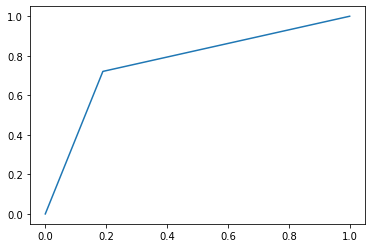

AUC: 0.23412947831552489


In [66]:
fpr, tpr , thresholds = metrics.roc_curve(y_test, predicciones, pos_label=0)
plt.plot(tpr, fpr)
plt.show()

auc=np.trapz(tpr, fpr)
print('AUC:', auc)